In [16]:
import pickle
import itertools
import os.path as op
from glob import glob

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import gridspec
import matplotlib.cm as cm
import ptitprince as pt
from matplotlib.ticker import FormatStrFormatter

In [2]:
result_dir = op.abspath("../results")
dec_data_dir = op.join(result_dir, "decoding")

In [3]:
hue_order = [
    'term_neurosynth_Percentile',
    'term_neuroquery_Percentile',
    'term_neurosynth_KMeans', 
    "term_neuroquery_KMeans", 
    "term_neurosynth_KDE", 
    "term_neuroquery_KDE",
    'lda_neurosynth_Percentile',
    'lda_neuroquery_Percentile',
    'lda_neurosynth_KMeans', 
    "lda_neuroquery_KMeans", 
    "lda_neurosynth_KDE", 
    "lda_neuroquery_KDE",
    'gclda_neurosynth_Percentile',
    'gclda_neuroquery_Percentile',
    'gclda_neurosynth_KMeans', 
    "gclda_neuroquery_KMeans", 
    "gclda_neurosynth_KDE", 
    "gclda_neuroquery_KDE",
]

                           method seg_sol      corr
0      term_neurosynth_Percentile       1  0.215554
1      term_neurosynth_Percentile       1  0.091610
2      term_neurosynth_Percentile       1  0.318514
3      term_neurosynth_Percentile       1  0.070797
4      term_neurosynth_Percentile       1  0.207412
...                           ...     ...       ...
91552        gclda_neuroquery_KDE       3 -0.091562
91553        gclda_neuroquery_KDE       3 -0.014256
91554        gclda_neuroquery_KDE       3  0.095816
91555        gclda_neuroquery_KDE       3 -0.142258
91556        gclda_neuroquery_KDE       3  0.011997

[91557 rows x 3 columns]


/var/folders/m9/_ygtgkg17990695673wz4l78j5bsz9/T/ipykernel_34873/1331060967.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1)


                            method seg_sol      corr
0       term_neurosynth_Percentile       1  0.215554
1       term_neurosynth_Percentile       1  0.091610
2       term_neurosynth_Percentile       1  0.318514
3       term_neurosynth_Percentile       1  0.070797
4       term_neurosynth_Percentile       1  0.207412
...                            ...     ...       ...
610375        gclda_neuroquery_KDE      17 -0.107440
610376        gclda_neuroquery_KDE      17 -0.028555
610377        gclda_neuroquery_KDE      17  0.100131
610378        gclda_neuroquery_KDE      17 -0.152800
610379        gclda_neuroquery_KDE      17 -0.013891

[610380 rows x 3 columns]
                             method seg_sol      corr
0        term_neurosynth_Percentile       1  0.215554
1        term_neurosynth_Percentile       1  0.091610
2        term_neurosynth_Percentile       1  0.318514
3        term_neurosynth_Percentile       1  0.070797
4        term_neurosynth_Percentile       1  0.207412
...          

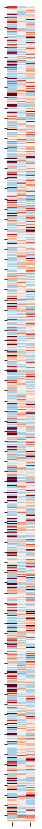

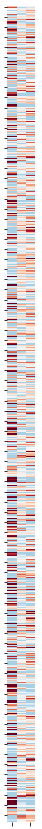

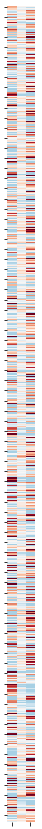

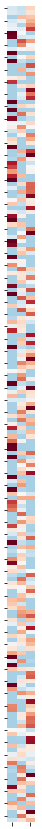

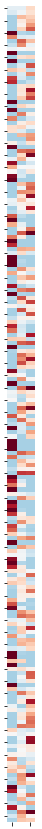

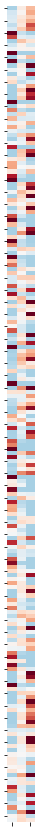

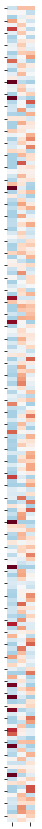

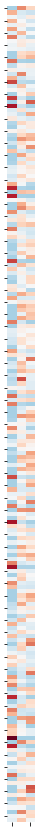

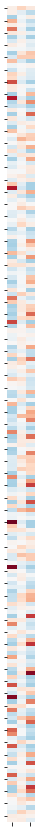

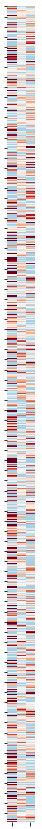

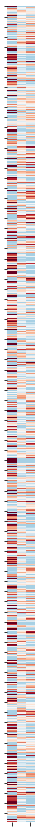

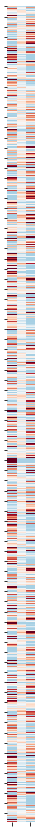

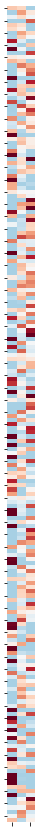

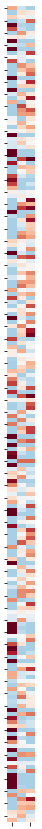

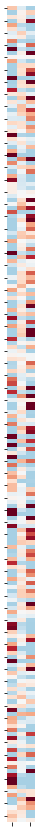

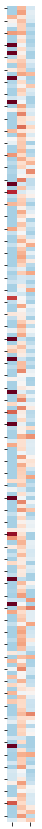

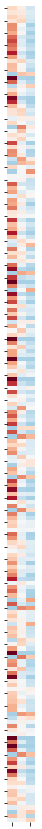

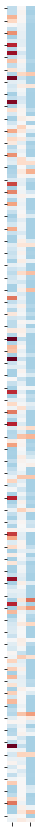

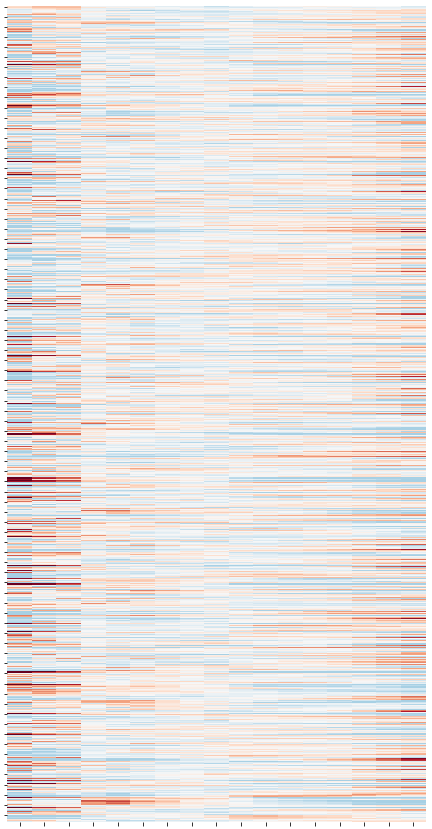

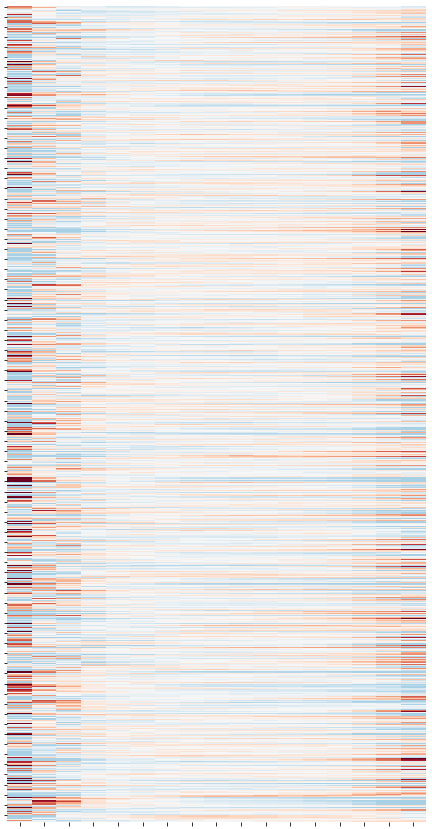

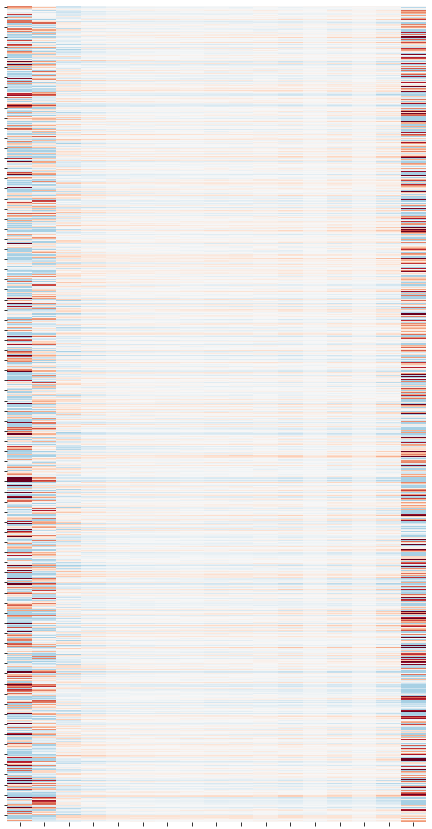

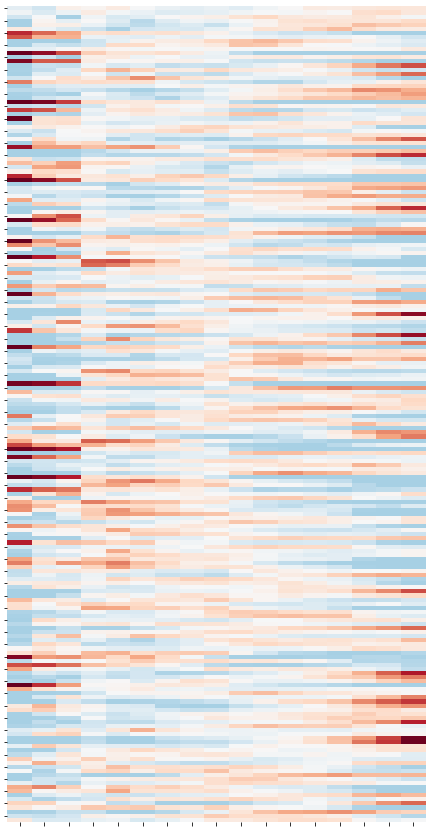

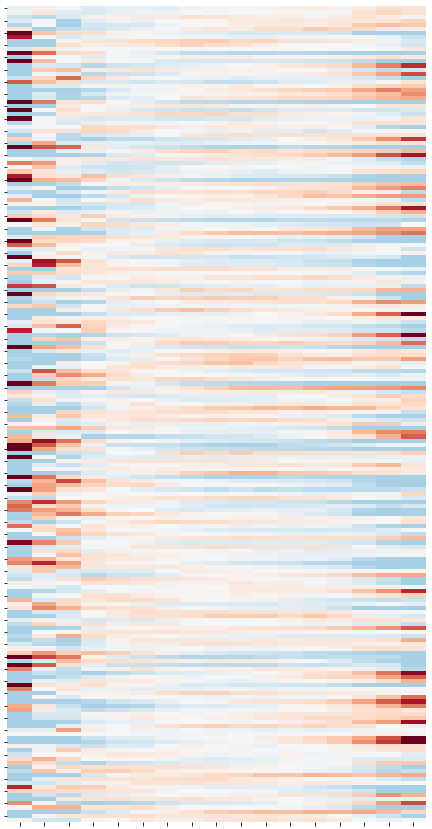

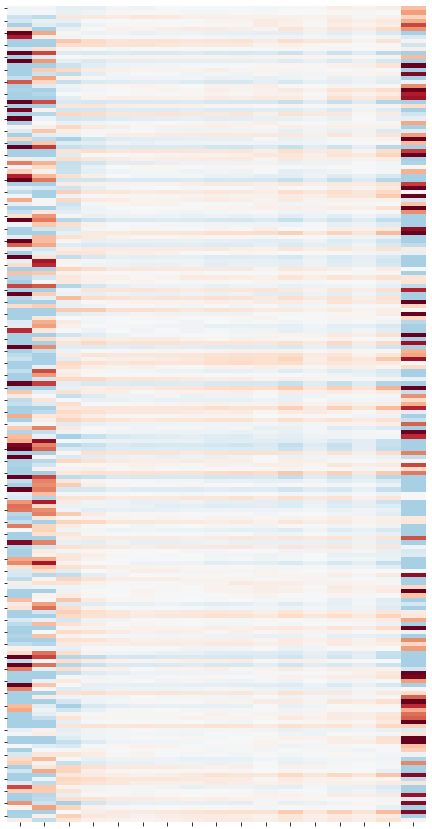

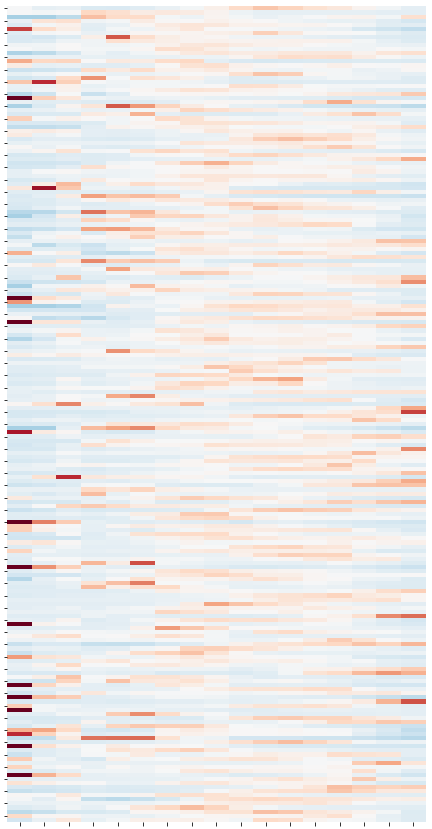

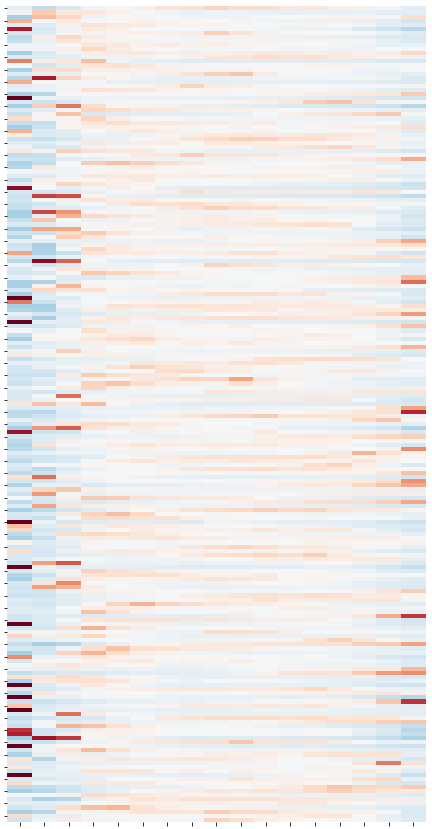

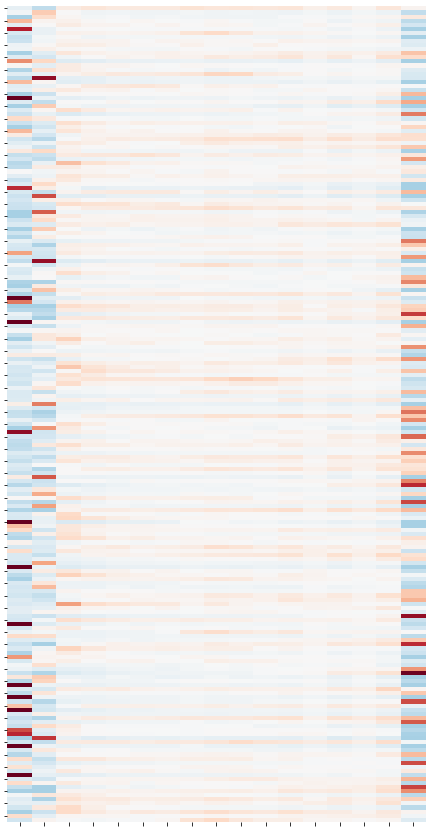

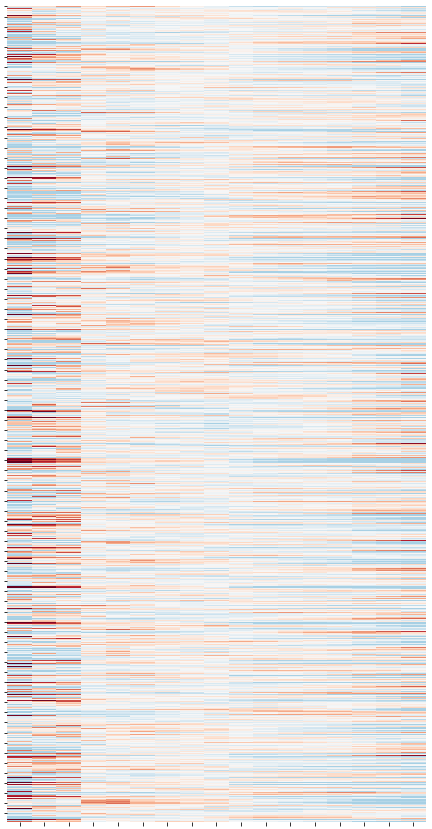

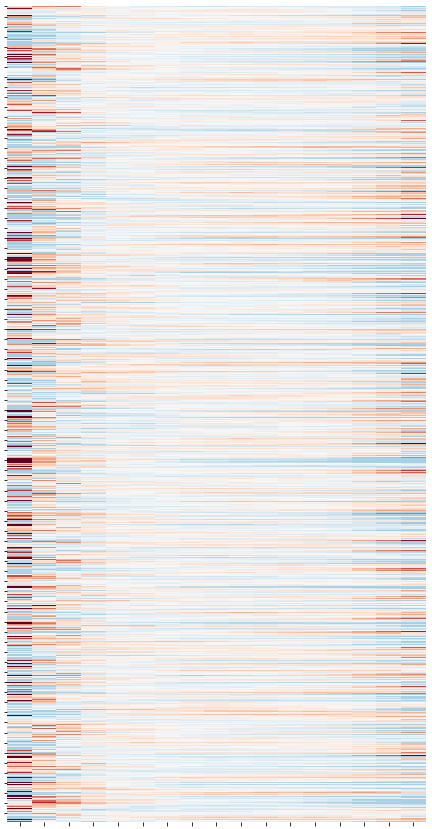

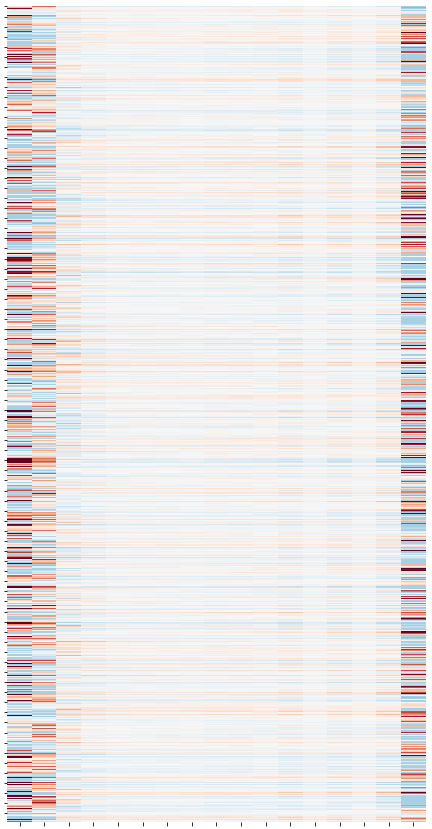

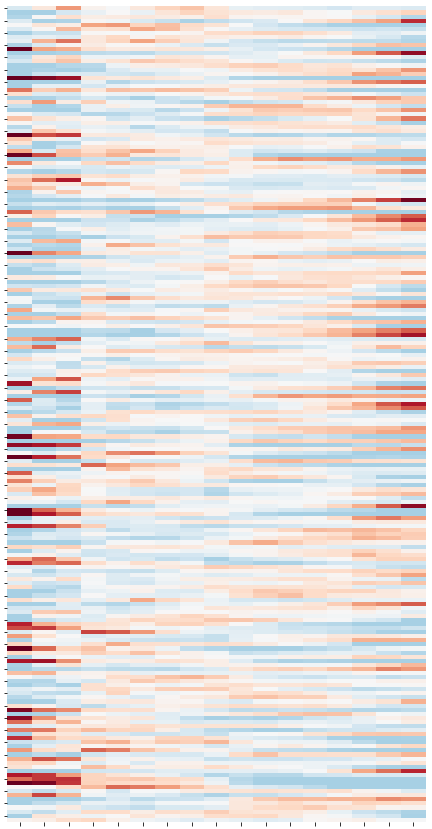

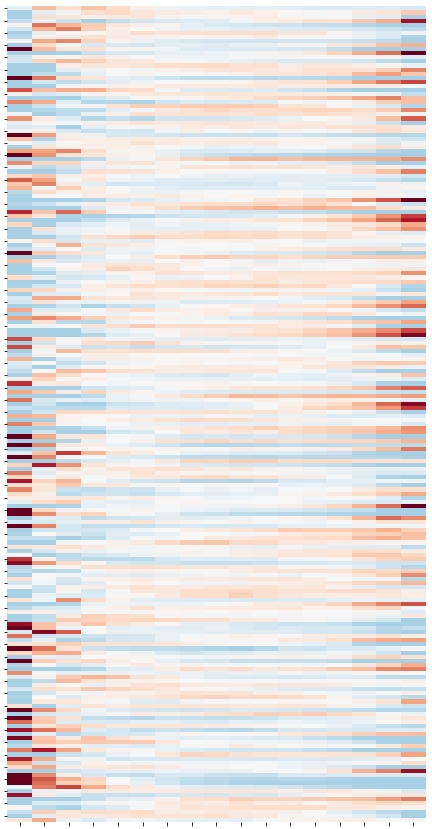

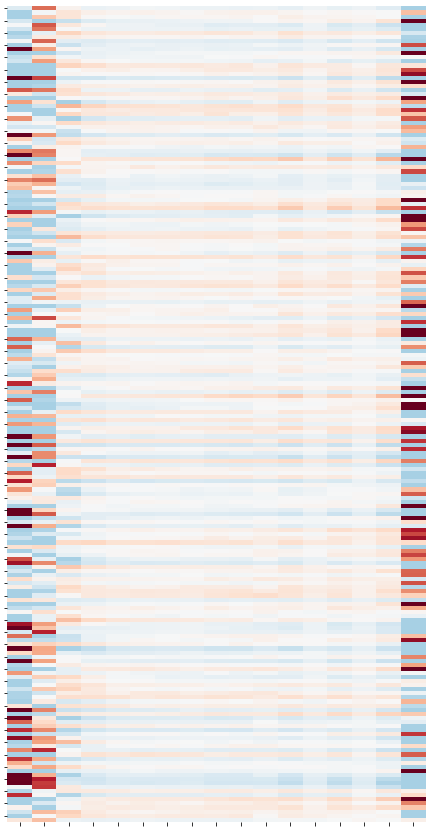

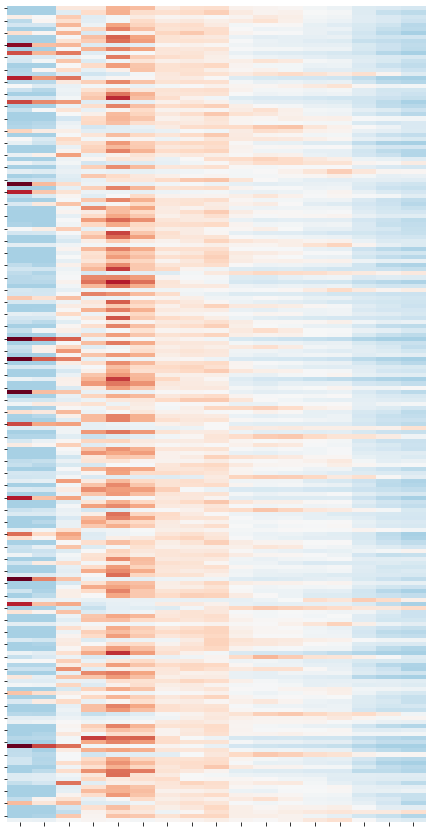

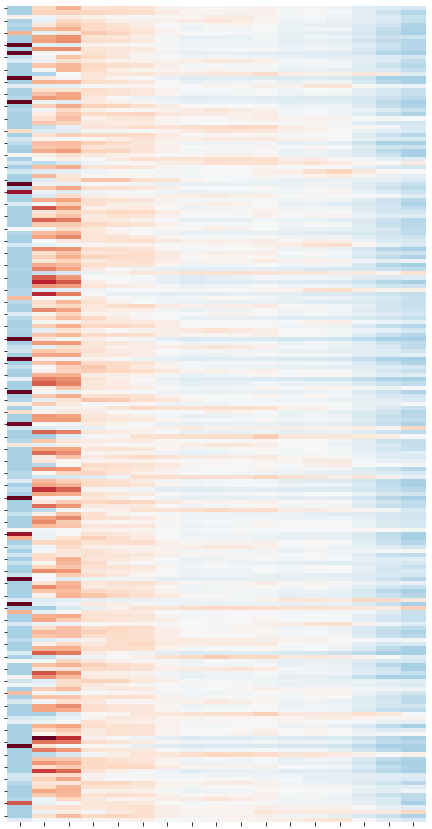

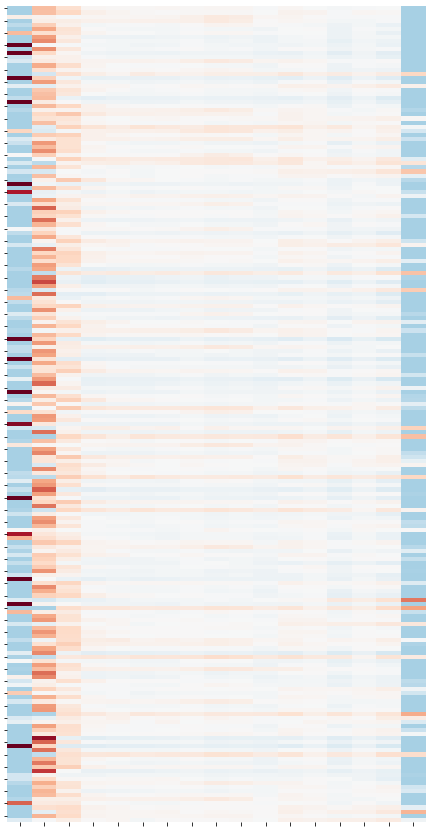

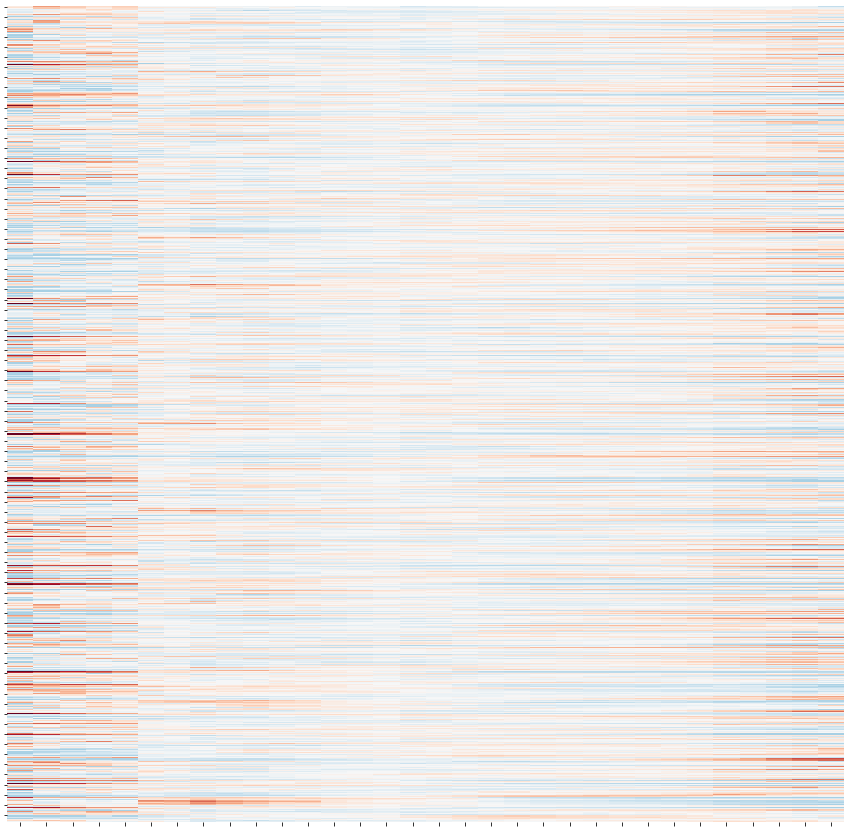

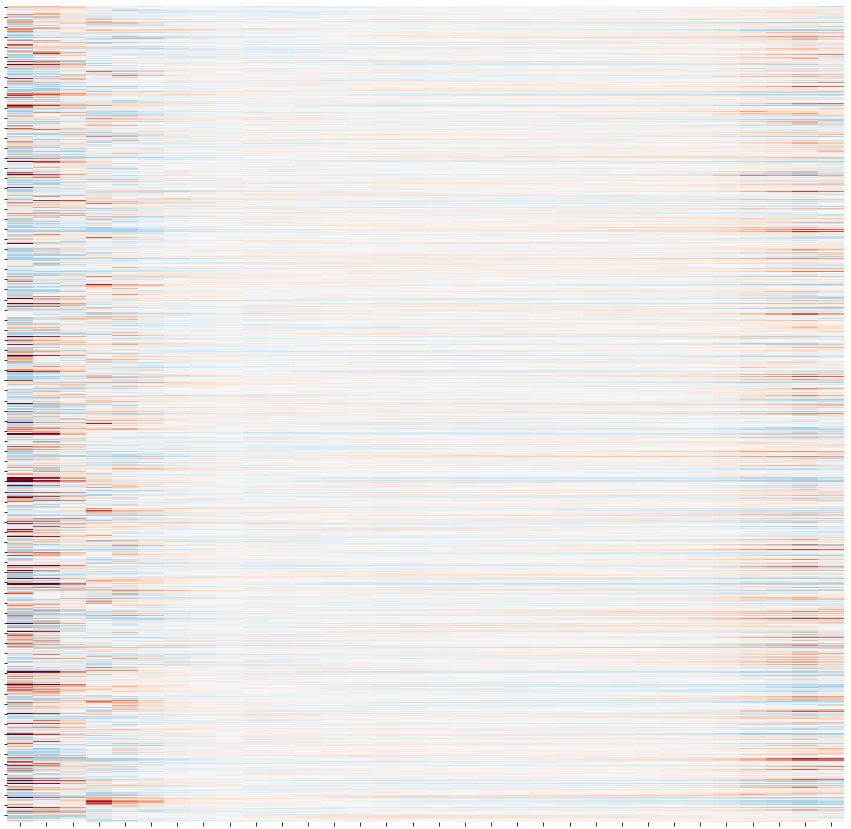

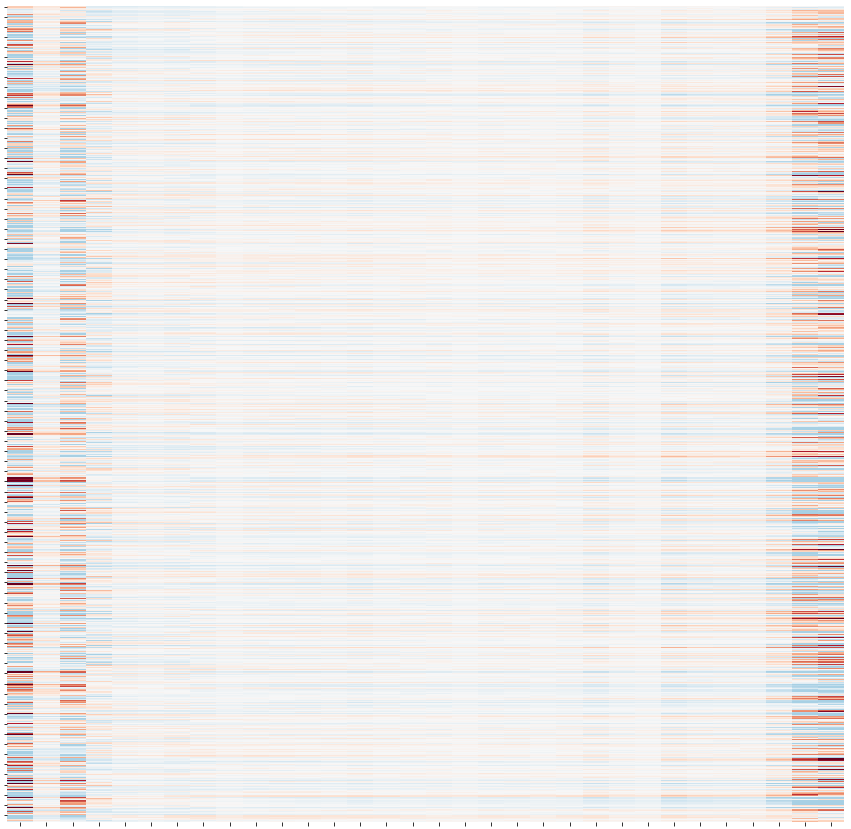

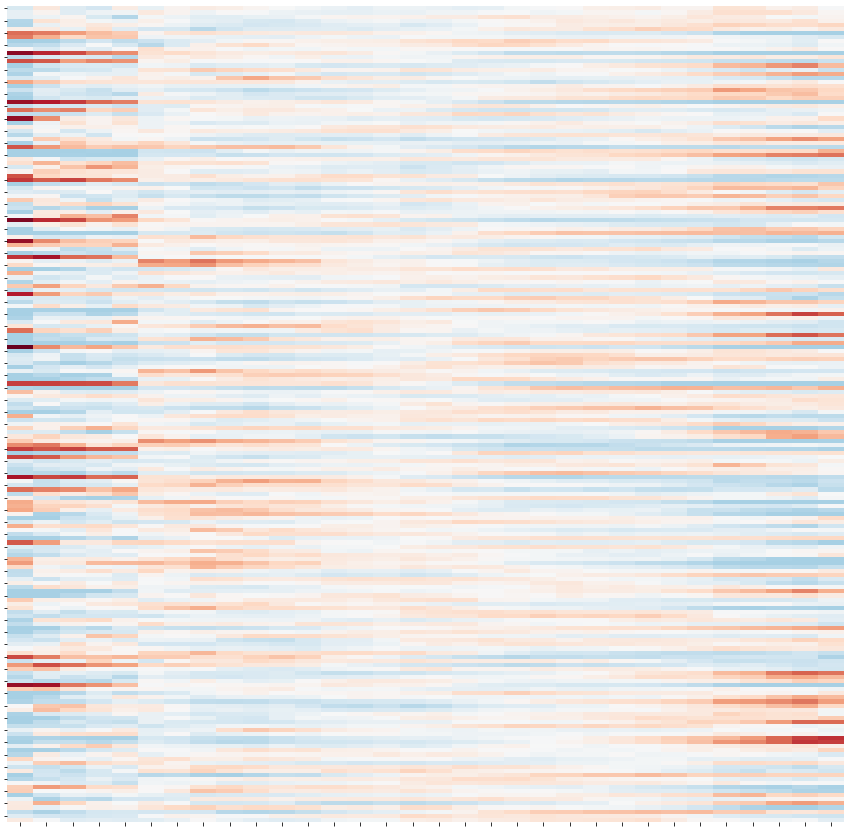

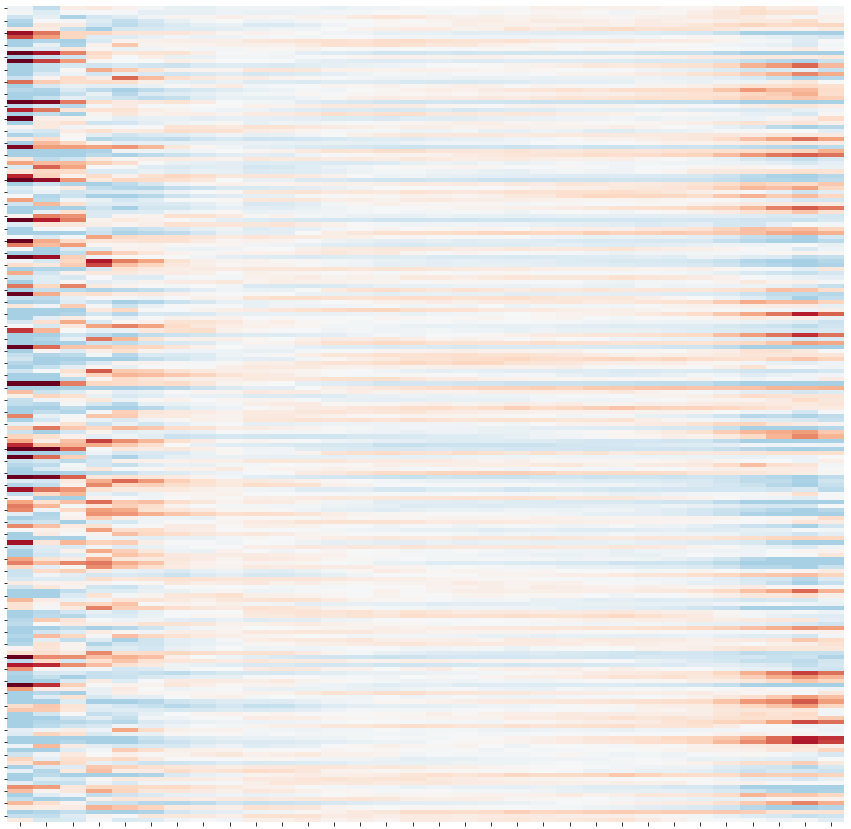

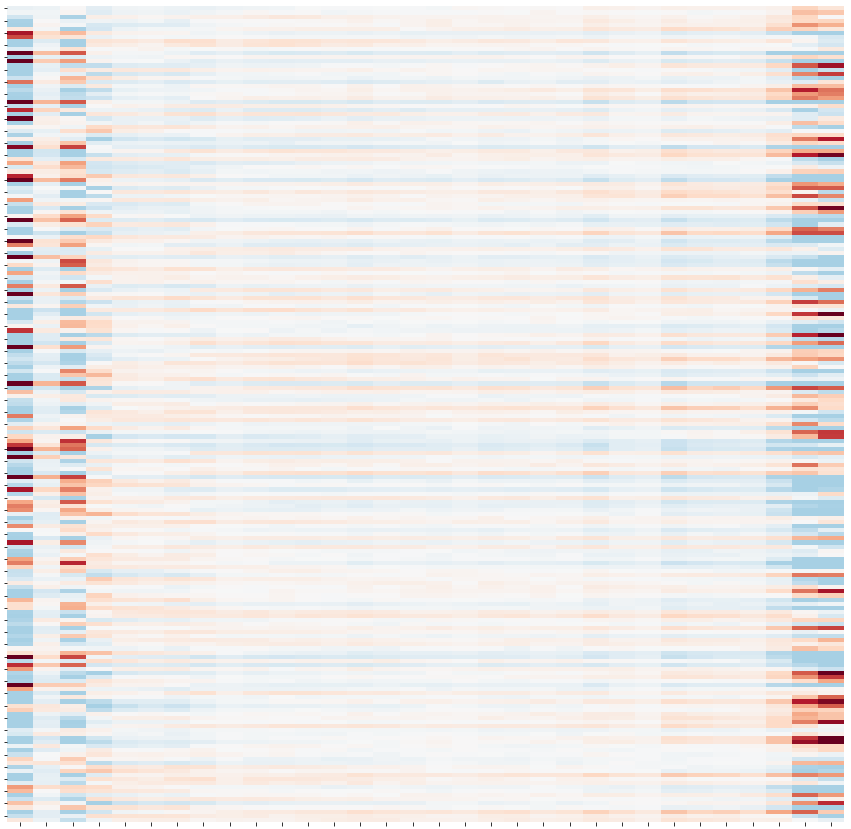

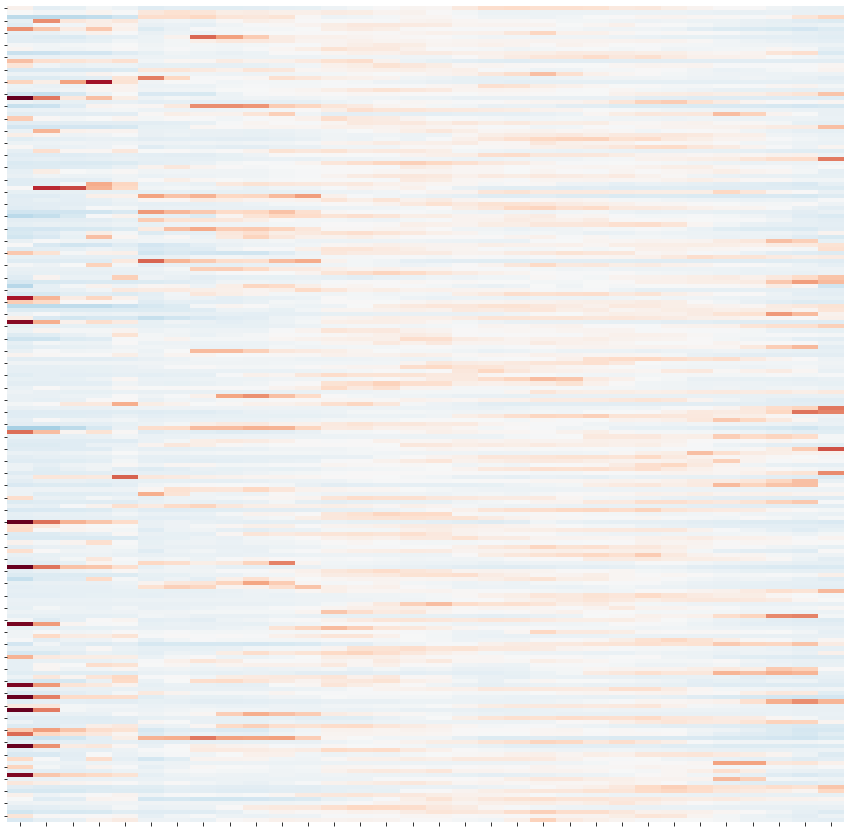

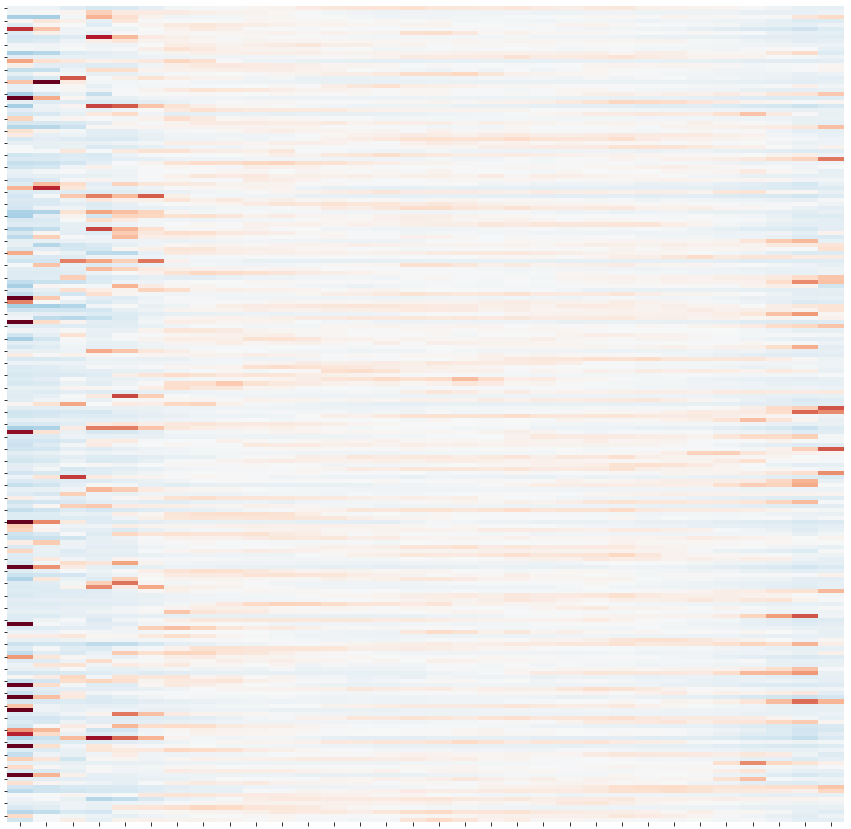

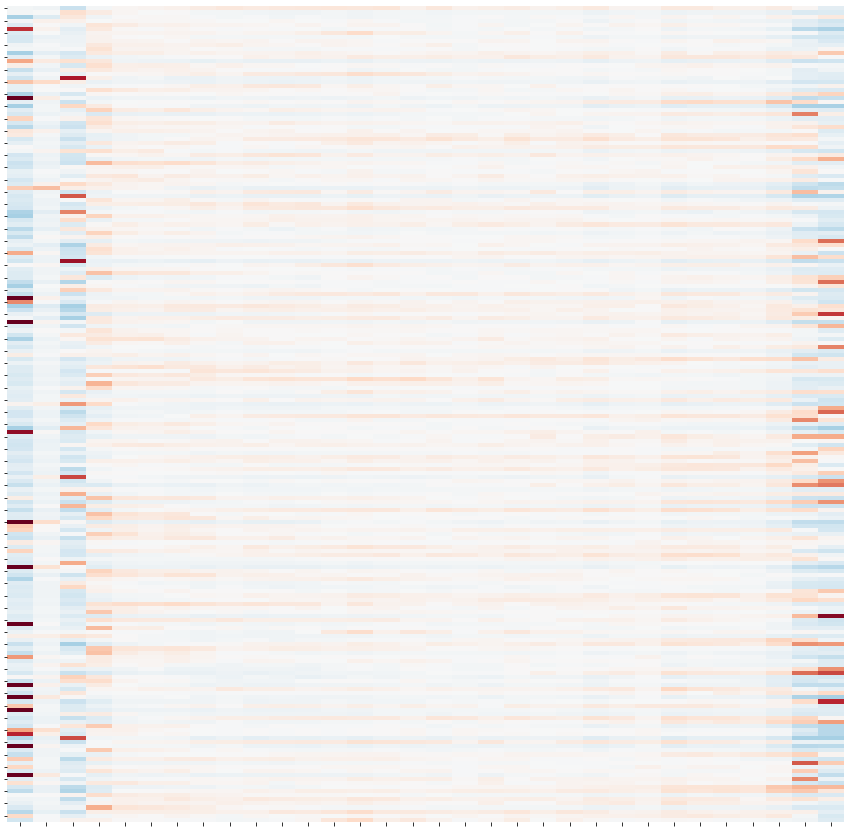

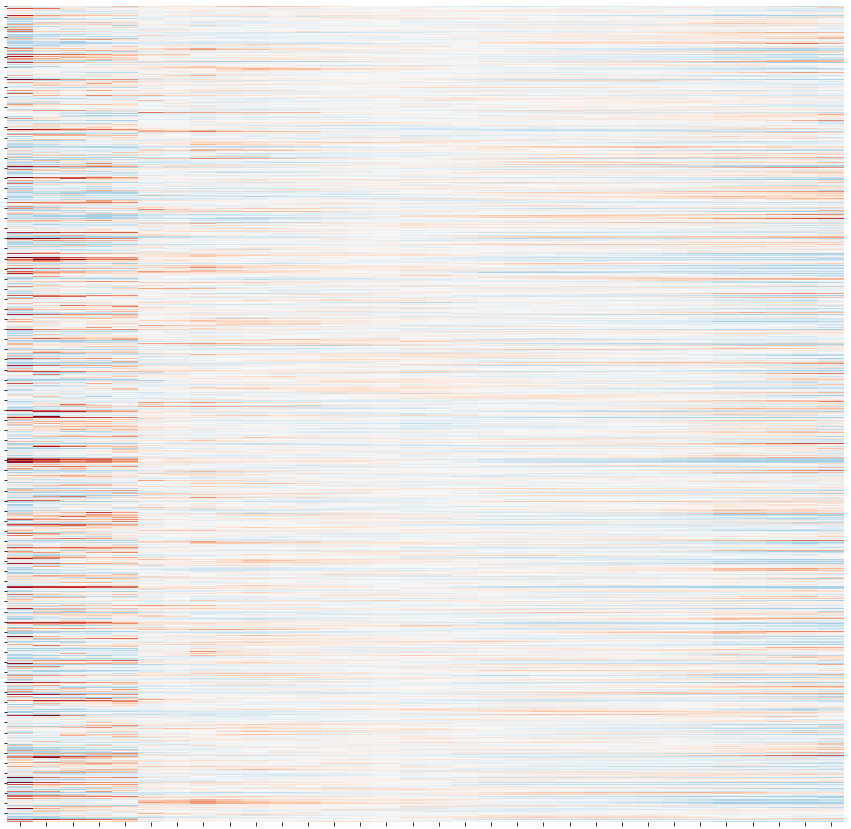

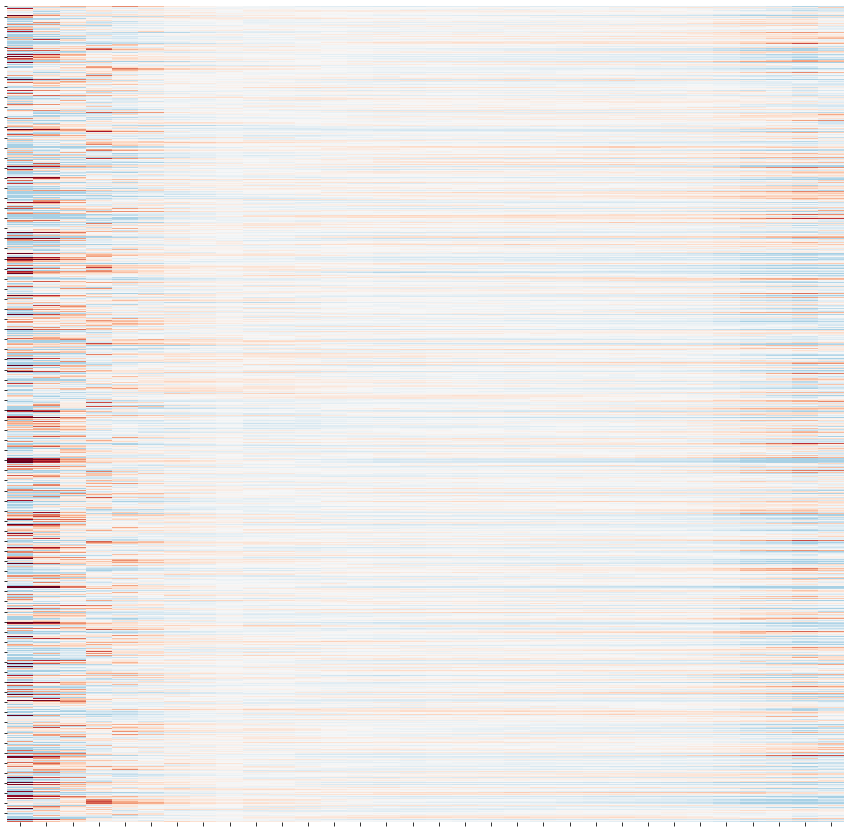

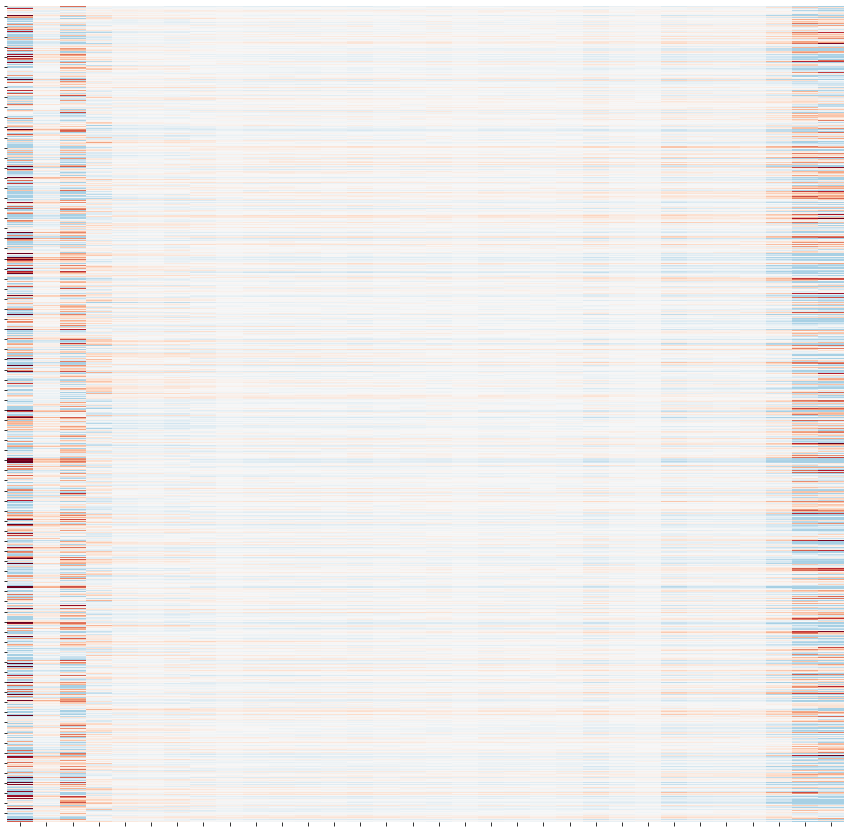

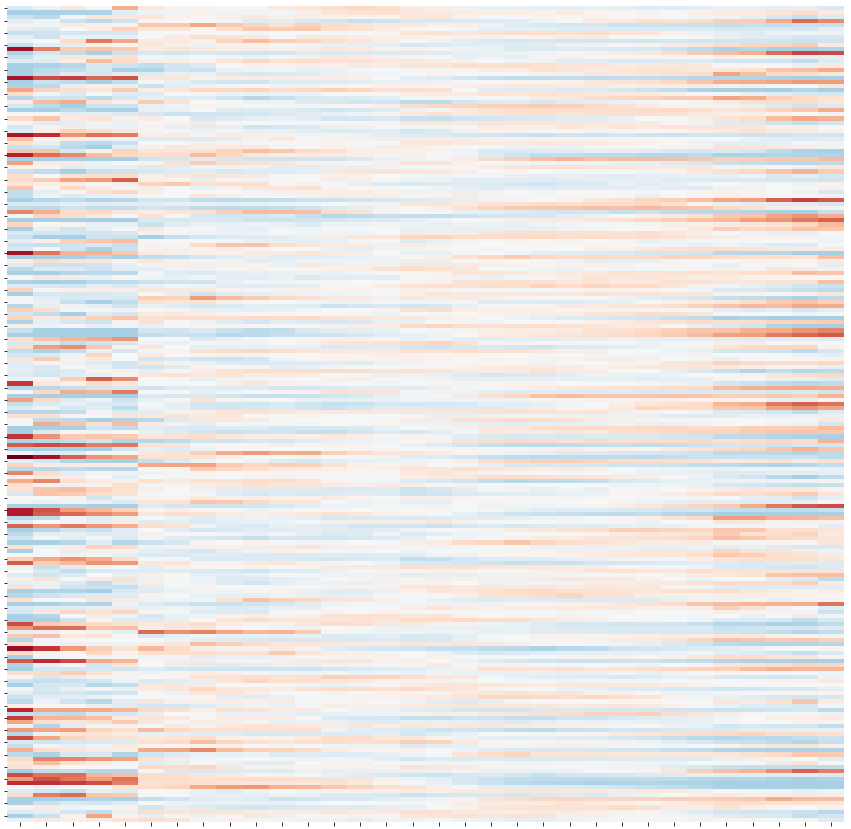

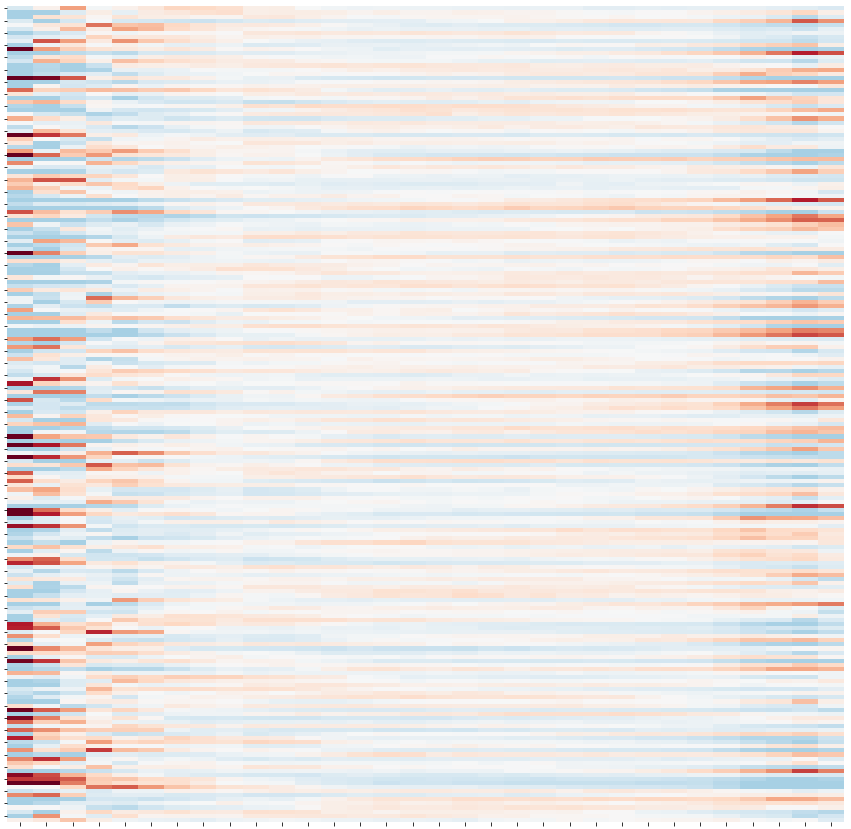

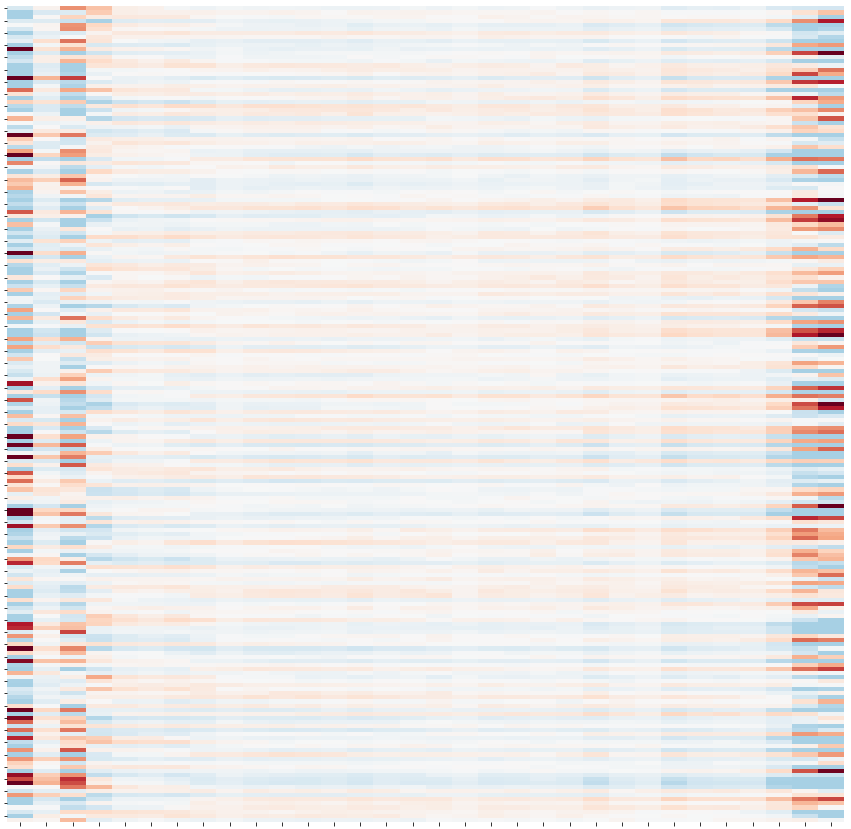

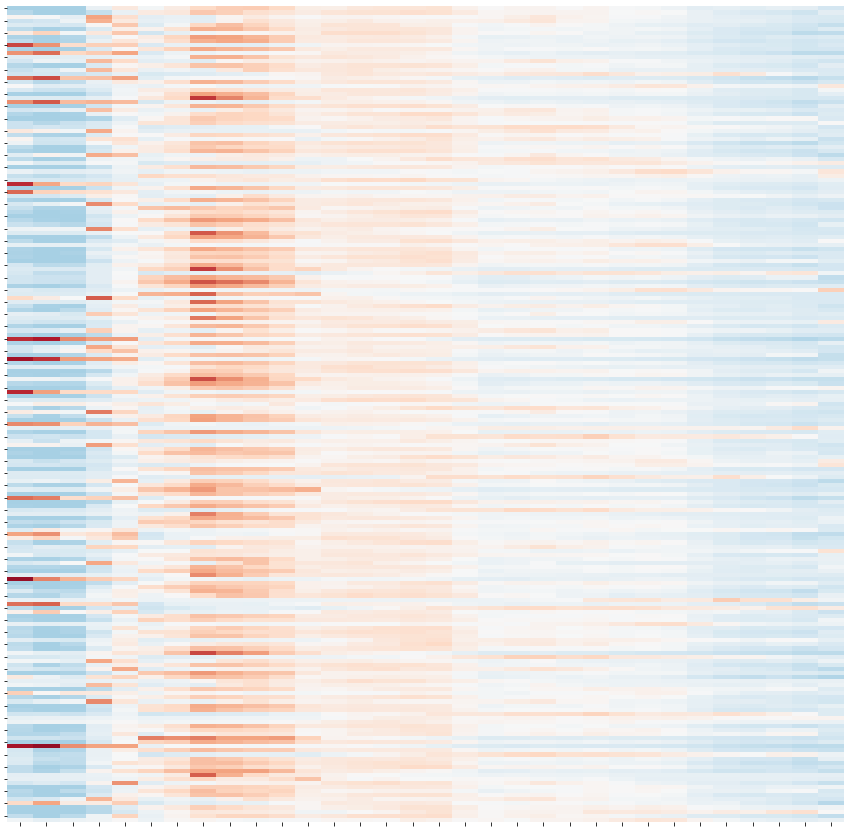

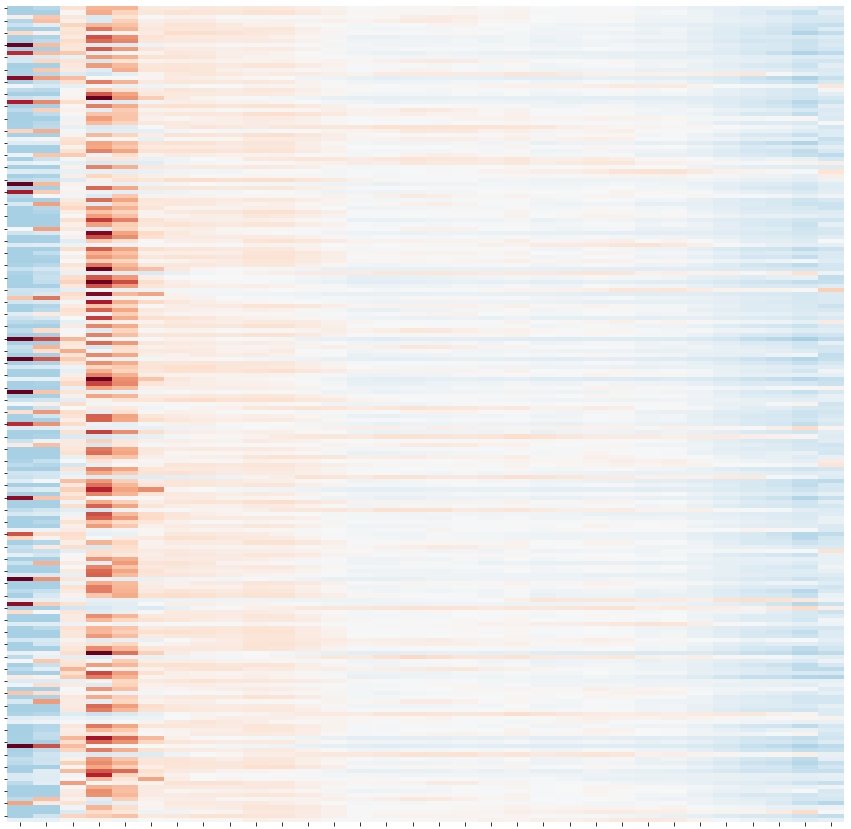

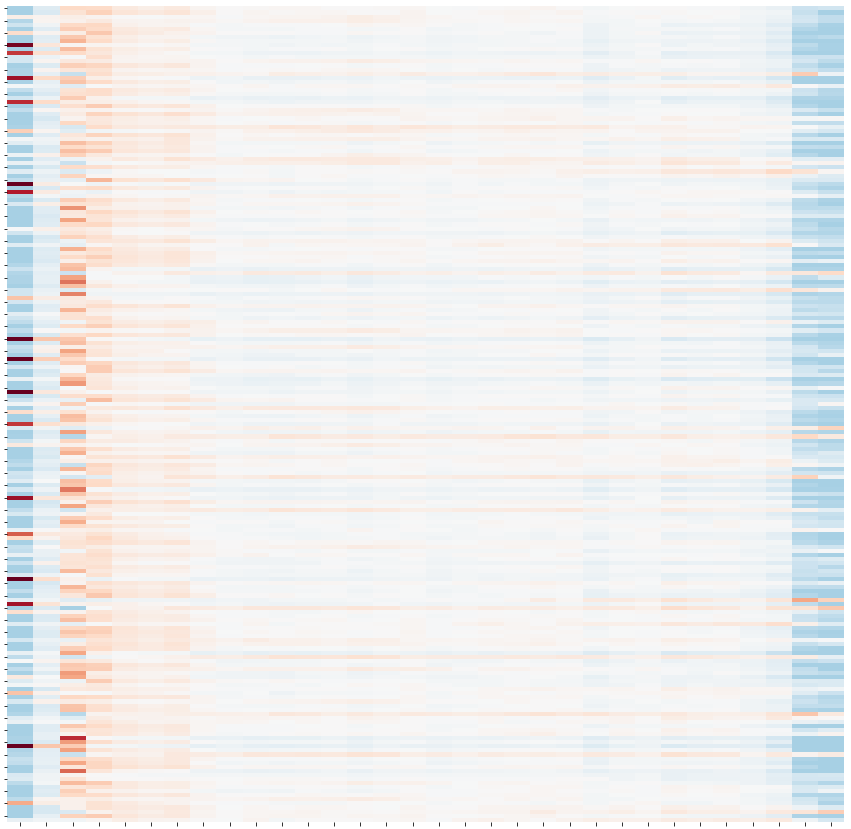

In [4]:
methods = ["Percentile", "KMeans", "KDE"]
dset_names = ["neurosynth", "neuroquery"]
models = ["term", "lda", "gclda"]

hight = 15
seg_sols = ["03", "17", "32"]
method_nm_lst, seg_sol_lst, corr_val_lst, data_df_lst = [], [], [], []
for seg_sol in seg_sols:
    data_df = pd.DataFrame()
    for dset_name, model, method in itertools.product(dset_names, models, methods):
        corr_dir = op.join(dec_data_dir, f"{model}_{dset_name}_corr_{method}")
        corr_file = op.join(corr_dir, f"{seg_sol}_corr.npy")
        corr_arr = np.load(corr_file)

        # Plot heatmaps
        width = corr_arr.shape[0] * 0.5 - 1
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(width, hight)
        sns.heatmap(
            corr_arr.T,
            cmap="RdBu_r", 
            square=False, 
            cbar=False,
            center=0,
            vmin=-0.1, vmax=0.3,
            ax=ax,
        )
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.savefig(op.join("./Fig", "decoding", f"heatmap-{seg_sol}_{model}_{dset_name}_{method}.eps"), bbox_inches="tight")
        
        # Collect data for df
        n_elements = corr_arr.shape[0] * corr_arr.shape[1]
        method_nm_lst.append([f"{model}_{dset_name}_{method}"] * n_elements)
        seg_sol_sub = [[str(id+1)] * corr_arr.shape[1] for id in range(int(seg_sol))]
        seg_sol_lst.append(np.hstack(seg_sol_sub))
        corr_val_lst.append(corr_arr.flatten())
    
    method_nm_arr = np.hstack(method_nm_lst)
    seg_sol_arr = np.hstack(seg_sol_lst)
    corr_val_arr = np.hstack(corr_val_lst)

    data_df["method"] = method_nm_arr
    data_df["seg_sol"] = seg_sol_arr
    data_df["corr"] = corr_val_arr
    data_df_lst.append(data_df)
    print(data_df)
    

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7.5, 9)

sns.stripplot(
    data=data_df, 
    x="corr", 
    y="seg_sol", 
    hue="method", 
    jitter=0.4, 
    size=2, 
    ax=ax, 
    palette="tab20",
    hue_order=hue_order,    
)
plt.legend([],[], frameon=False)

In [ ]:

corrs_seg_fn = op.join(result_dir, "decoding", "gclda_corrs_segments.pkl")
corrs_segments_file = open(corrs_seg_fn, "rb")
corrs_seg_dict = pickle.load(corrs_segments_file)
sns.set(style="whitegrid")

segment_sizes = [corrs_seg.shape[1] for corrs_seg in corrs_seg_dict["kmeans_grad_segments"]]
segment_sizes = [segment_size/np.min(segment_sizes) for segment_size in segment_sizes]

n_segmentations = len(corrs_seg_dict["kmeans_grad_segments"])
# gs = gridspec.GridSpec(1, n_segmentations, width_ratios=segment_sizes)

fig, axes = plt.subplots(1, n_segmentations, gridspec_kw={'width_ratios': segment_sizes})
fig.set_size_inches(15, 2)

for segmentation_i in range(n_segmentations):
    print(corrs_seg_dict["kmeans_grad_segments"][segmentation_i].shape)
    sns.heatmap(
        corrs_seg_dict["kmeans_grad_segments"][segmentation_i], 
        cmap="RdBu_r", 
        square=False, 
        cbar=False,
        center=0,
        vmin=-0.1, vmax=0.3,
        ax=axes[segmentation_i],
    )
    axes[segmentation_i].set_yticklabels([])
    axes[segmentation_i].set_xticklabels([])
    axes[segmentation_i].set_title(f"{segmentation_i + 3}")

plt.subplots_adjust(wspace=0.1)
# fig.tight_layout()
plt.savefig(op.join("./Fig", "corr_matrices.eps"), bbox_inches="tight")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


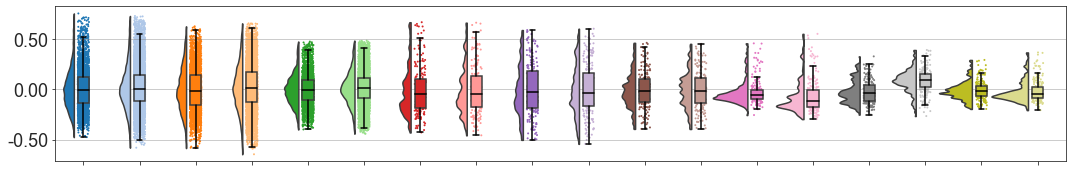

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


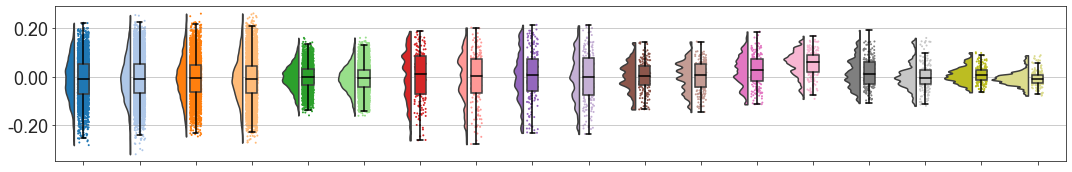

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


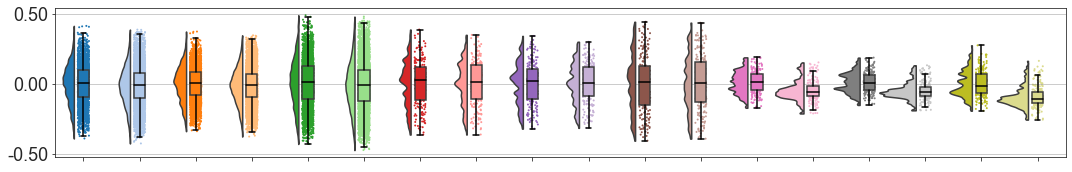

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


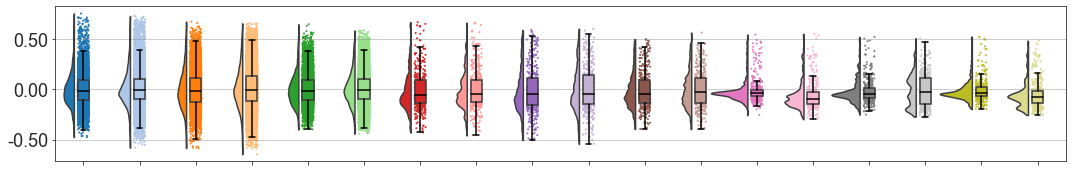

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


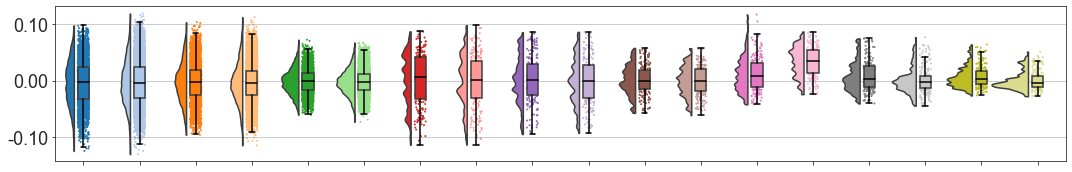

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


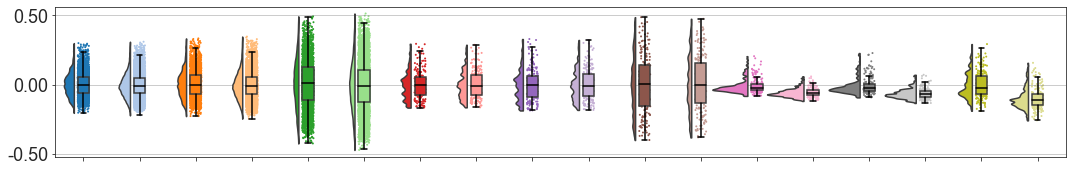

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


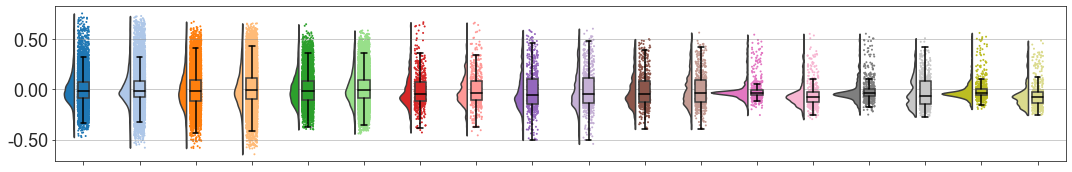

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


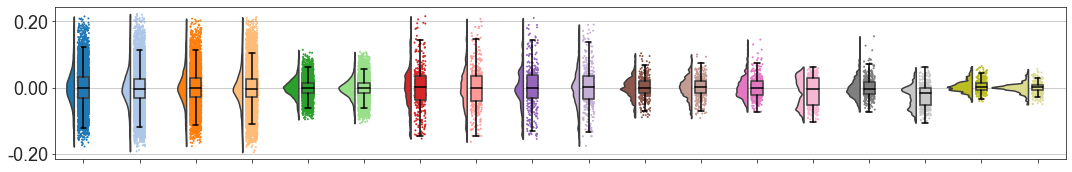

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


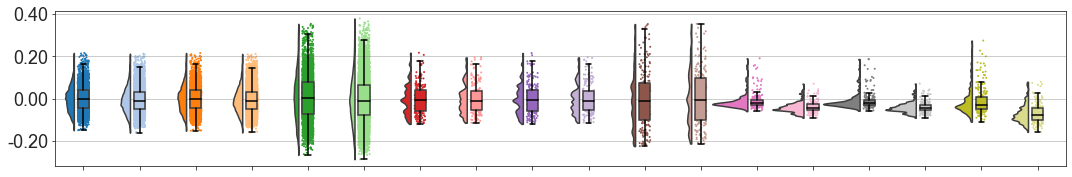

In [50]:
# sns.set(style="whitegrid")
sns.set_style("ticks")

cmap="tab20"
# segment_sizes = [3]
# sub_segment_sizes = [[1,2,3]]
segment_sizes = [3, 17, 32]
sub_segment_sizes = [[1,2,3], [1,9,17], [1,16,32]]
ort = "v"
dy = "corr"
dx = "method"
for segm_i, segment_size in enumerate(segment_sizes):
    violin_df = data_df_lst[segm_i]
    
    for sub_segment_size in sub_segment_sizes[segm_i]:
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(15, 2.5)

        sub_violin_df = violin_df[violin_df.seg_sol == str(sub_segment_size)]
        pt.half_violinplot(
            x=dx,
            y=dy,
            data=sub_violin_df,
            order=hue_order,
            palette=cmap,
            bw=0.1,
            cut=0.0,
            width=1.3,
            dodge=False,
            inner=None,
            alpha=1,
            scale="area",
            offset=.17,
            saturation=1,
            orient=ort,
            ax=ax,
        )
        sns.stripplot(
            x=dx,
            y=dy,
            data=sub_violin_df,
            order=hue_order,
            palette=cmap,
            edgecolor="white",
            dodge=False,
            size=2,
            jitter=1,
            zorder=0,
            orient=ort,
            ax=ax,
        )
        box_axe = sns.boxplot(
            x=dx,
            y=dy,
            data=sub_violin_df,
            order=hue_order,
            palette=cmap,
            width=0.2,
            zorder=10,
            dodge=True,
            showcaps=True,
            showfliers=False,
            boxprops={"zorder": 9},
            whiskerprops={"color": "black", "zorder": 10},
            capprops={"color": "black", "zorder": 10},
            medianprops={"color": "black", "zorder": 10},
            saturation=1,
            orient=ort,
            ax=ax,
        )
        #plt.setp(box_axe.collections + box_axe.artists, alpha=0.8)

        # ax.set_ylabel("Correlation Coefficient", fontsize=20)
        ax.set_ylabel("")
        ax.set_xlabel("")
        # ax.set_yticks([-1, -0.5, 0, 0.5, 1])
        # ax.set_yticklabels([-1, -0.5, 0, 0.5, 1], fontsize=18)
        ax.yaxis.set_tick_params(labelsize=18)
        ax.set_xticklabels([])
        # plt.xticks(rotation=90)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.grid(axis='y', which='major', color='gray', alpha=0.5)

        fig.tight_layout()
        fig.savefig(op.join("./Fig", "decoding", f"violin-{segment_size:02d}-{sub_segment_size:02d}.eps"), bbox_inches="tight")
        plt.show()

In [44]:
data_df_lst[0].query('method == "lda_neuroquery_KMeans" & seg_sol == "1"')

,method,seg_sol,corr
88557,lda_neuroquery_KMeans,1,0.113715
88558,lda_neuroquery_KMeans,1,-0.210065
88559,lda_neuroquery_KMeans,1,0.069275
88560,lda_neuroquery_KMeans,1,-0.216608
88561,lda_neuroquery_KMeans,1,0.315747
...,...,...,...
88752,lda_neuroquery_KMeans,1,-0.217410
88753,lda_neuroquery_KMeans,1,-0.162320
88754,lda_neuroquery_KMeans,1,0.056053
88755,lda_neuroquery_KMeans,1,0.026726
